##WHAT IS VEHICLE INSURANCE CLAIM?
A Vehicle insurance claim is a procedure wherein the policyholder requests the insurance provider to compensate them for the damages suffered by their vehicle mainly due to an accident, natural or manmade calamities, fire, etc.


##PROBLEM STATEMENT
Vehicle insurance fraud involves conspiring to make false or exaggerated claims involving property damage or personal injuries following an accident. Some common examples include staged accidents where fraudsters deliberately “arrange” for accidents to occur; the use of phantom passengers where people who were not even at the scene of the accident claim to have suffered grievous injury, and make false personal injury claims where personal injuries are grossly exaggerated.

This dataset contains vehicle dataset - attribute, model, accident details, etc along with policy details - policy type, tenure etc. Our Objective is to detect if a claim application is fraudulent or not - FraudFound_P.

In [1]:
pip install pandas

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [3]:
data=pd.read_csv("fraud_oracle.csv")
data

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,Nov,4,Friday,Toyota,Urban,Tuesday,Nov,5,Male,Married,...,6 years,31 to 35,No,No,External,none,no change,1 vehicle,1996,Collision
15416,Nov,5,Thursday,Pontiac,Urban,Friday,Dec,1,Male,Married,...,6 years,31 to 35,No,No,External,more than 5,no change,3 to 4,1996,Liability
15417,Nov,5,Thursday,Toyota,Rural,Friday,Dec,1,Male,Single,...,5 years,26 to 30,No,No,External,1 to 2,no change,1 vehicle,1996,Collision
15418,Dec,1,Monday,Toyota,Urban,Thursday,Dec,2,Female,Married,...,2 years,31 to 35,No,No,External,more than 5,no change,1 vehicle,1996,All Perils


In [4]:
data.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,3 years,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,6 years,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,7 years,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,more than 7,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,5 years,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision


In [5]:
#Getting information about our dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  FraudFound_P          15420 non-null

In [6]:
#Getting Description about our dataset
data.describe()

,WeekOfMonth,WeekOfMonthClaimed,Age,FraudFound_P,PolicyNumber,RepNumber,Deductible,DriverRating,Year
count,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000,15420.000000
mean,2.788586,2.693969,39.855707,0.059857,7710.500000,8.483268,407.704280,2.487808,1994.866472
std,1.287585,1.259115,13.492377,0.237230,4451.514911,4.599948,43.950998,1.119453,0.803313
min,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,300.000000,1.000000,1994.000000
25%,2.000000,2.000000,31.000000,0.000000,3855.750000,5.000000,400.000000,1.000000,1994.000000
50%,3.000000,3.000000,38.000000,0.000000,7710.500000,8.000000,400.000000,2.000000,1995.000000
75%,4.000000,4.000000,48.000000,0.000000,11565.250000,12.000000,400.000000,3.000000,1996.000000
max,5.000000,5.000000,80.000000,1.000000,15420.000000,16.000000,700.000000,4.000000,1996.000000


In [7]:
#Checking for null values in our dataset
data.isnull().sum()/len(data)*100

Month                   0.0
WeekOfMonth             0.0
DayOfWeek               0.0
Make                    0.0
AccidentArea            0.0
DayOfWeekClaimed        0.0
MonthClaimed            0.0
WeekOfMonthClaimed      0.0
Sex                     0.0
MaritalStatus           0.0
Age                     0.0
Fault                   0.0
PolicyType              0.0
VehicleCategory         0.0
VehiclePrice            0.0
FraudFound_P            0.0
PolicyNumber            0.0
RepNumber               0.0
Deductible              0.0
DriverRating            0.0
Days_Policy_Accident    0.0
Days_Policy_Claim       0.0
PastNumberOfClaims      0.0
AgeOfVehicle            0.0
AgeOfPolicyHolder       0.0
PoliceReportFiled       0.0
WitnessPresent          0.0
AgentType               0.0
NumberOfSuppliments     0.0
AddressChange_Claim     0.0
NumberOfCars            0.0
Year                    0.0
BasePolicy              0.0
dtype: float64

##EXPLORATORY DATA ANALYSIS

In [8]:
#Visualization of Target Variable
data['FraudFound_P'].value_counts()

0    14497
1      923
Name: FraudFound_P, dtype: int64

In [9]:
# We can conclude that there are 923 insurance claims that are found to be fraud.

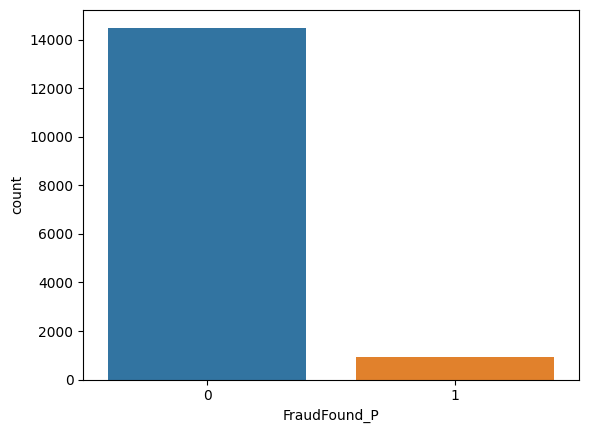

In [10]:
sns.countplot(x=data['FraudFound_P'])
plt.show()

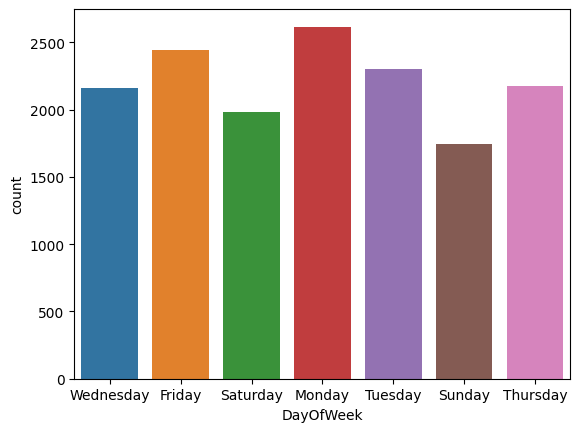

In [11]:
#Count of insurance claim made in each day of the week
sns.countplot(x=data['DayOfWeek'])
plt.show()

In [12]:
# We can observe that maximum insurance claim was made on Monday.

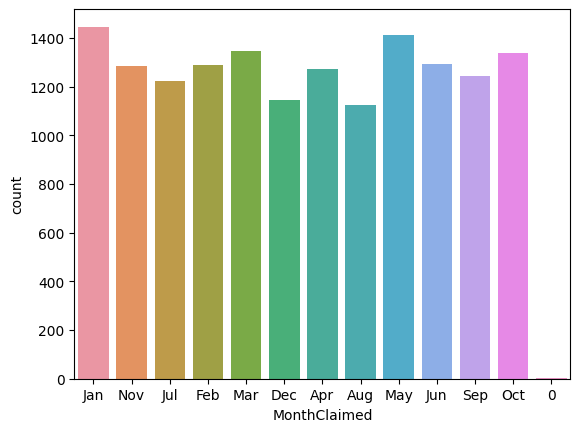

In [13]:
# Count of insurance claim made in each month
sns.countplot(x=data['MonthClaimed'])
plt.show()

In [14]:
# We can observe that maximum insurance claim was made in the month of January.

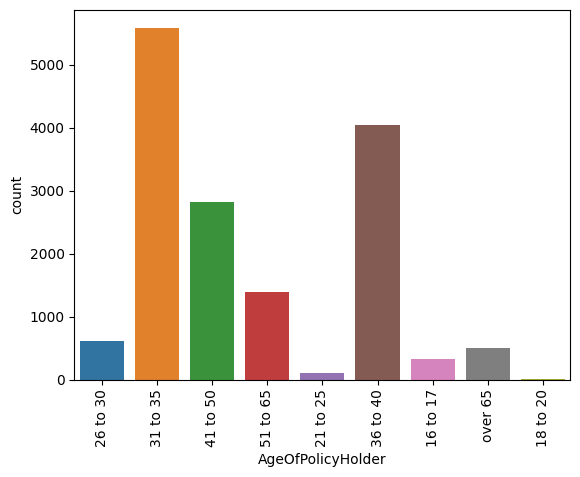

In [15]:
# Count of Age of Policy Holder
sns.countplot(x=data['AgeOfPolicyHolder'])
plt.xticks(rotation=90)
plt.show()

In [16]:
# We can conclude that most of the policy holders belong in the age group of 31 to 35.

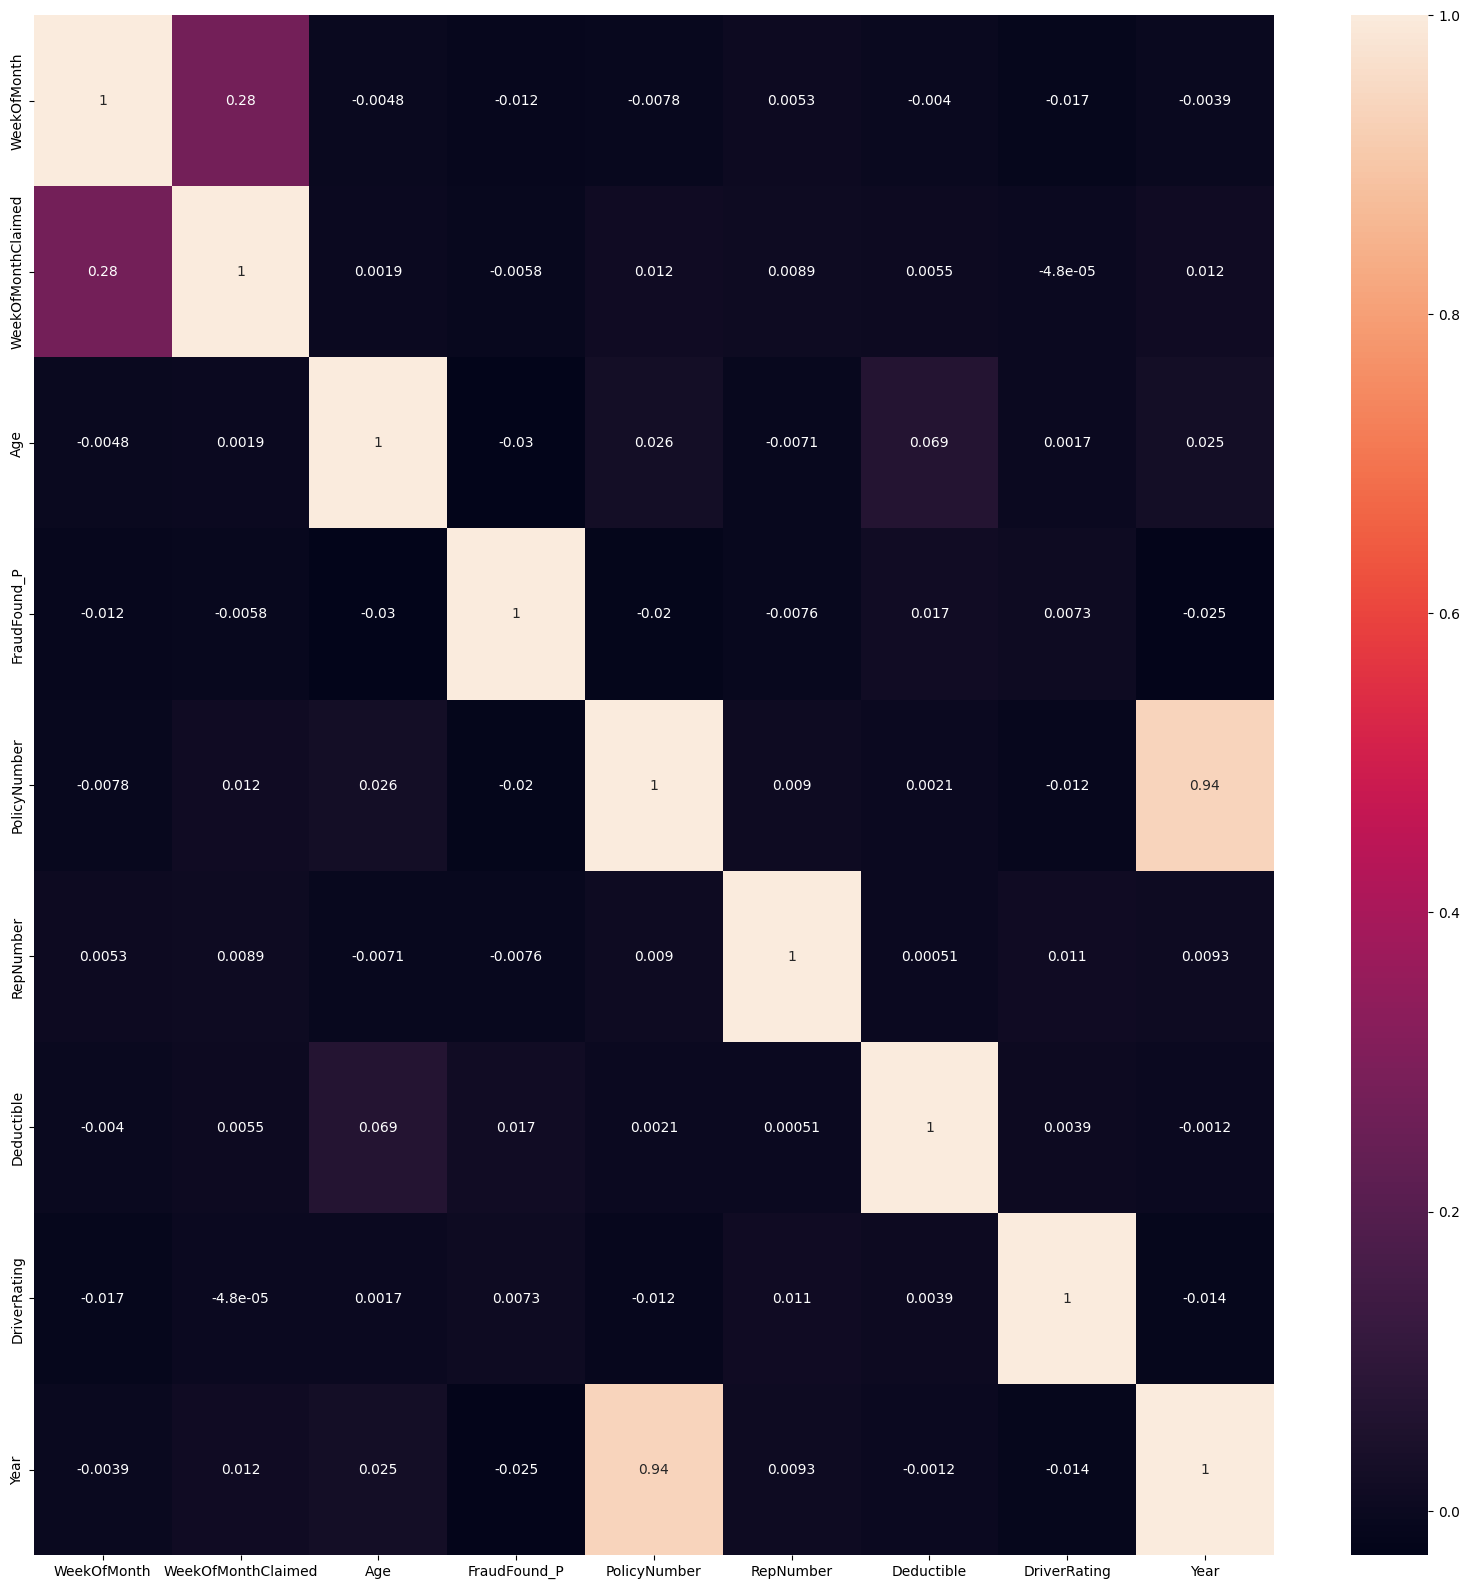

In [17]:
# Observing Correlations between feature and target variables
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)
plt.show()

##DATA PREPROCESSING AND PRINCIPAL COMPONENT ANALYSIS

In [18]:
#Converting all Categorical columns into Numerical columns using Label Encoding Technique.

In [19]:
cat_col_list=list(data.select_dtypes(include=['O']))
cat_col_list

['Month',
 'DayOfWeek',
 'Make',
 'AccidentArea',
 'DayOfWeekClaimed',
 'MonthClaimed',
 'Sex',
 'MaritalStatus',
 'Fault',
 'PolicyType',
 'VehicleCategory',
 'VehiclePrice',
 'Days_Policy_Accident',
 'Days_Policy_Claim',
 'PastNumberOfClaims',
 'AgeOfVehicle',
 'AgeOfPolicyHolder',
 'PoliceReportFiled',
 'WitnessPresent',
 'AgentType',
 'NumberOfSuppliments',
 'AddressChange_Claim',
 'NumberOfCars',
 'BasePolicy']

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
lab=LabelEncoder()

In [22]:
for i in cat_col_list:
  data[i]=lab.fit_transform(data[i])

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Month                 15420 non-null  int64
 1   WeekOfMonth           15420 non-null  int64
 2   DayOfWeek             15420 non-null  int64
 3   Make                  15420 non-null  int64
 4   AccidentArea          15420 non-null  int64
 5   DayOfWeekClaimed      15420 non-null  int64
 6   MonthClaimed          15420 non-null  int64
 7   WeekOfMonthClaimed    15420 non-null  int64
 8   Sex                   15420 non-null  int64
 9   MaritalStatus         15420 non-null  int64
 10  Age                   15420 non-null  int64
 11  Fault                 15420 non-null  int64
 12  PolicyType            15420 non-null  int64
 13  VehicleCategory       15420 non-null  int64
 14  VehiclePrice          15420 non-null  int64
 15  FraudFound_P          15420 non-null  int64
 16  Poli

In [24]:
#Applying Principal Component Analysis

In [25]:
#Extracting Features

In [26]:
x=data[['Month', 'WeekOfMonth', 'DayOfWeek', 'Make', 'AccidentArea',
       'DayOfWeekClaimed', 'MonthClaimed', 'WeekOfMonthClaimed', 'Sex',
       'MaritalStatus', 'Age', 'Fault', 'PolicyType', 'VehicleCategory',
       'VehiclePrice','PolicyNumber', 'RepNumber',
       'Deductible', 'DriverRating', 'Days_Policy_Accident',
       'Days_Policy_Claim', 'PastNumberOfClaims', 'AgeOfVehicle',
       'AgeOfPolicyHolder', 'PoliceReportFiled', 'WitnessPresent', 'AgentType',
       'NumberOfSuppliments', 'AddressChange_Claim', 'NumberOfCars', 'Year',
       'BasePolicy']]

In [27]:
x

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfVehicle,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy
0,2,5,6,6,1,6,5,1,0,2,...,1,3,0,0,0,3,0,2,1994,2
1,4,3,6,6,1,2,5,4,1,2,...,4,4,1,0,0,3,3,0,1994,1
2,10,5,0,6,1,5,10,2,1,1,...,5,6,0,0,0,3,3,0,1994,1
3,6,2,2,17,0,1,6,1,1,1,...,6,7,1,0,0,2,3,0,1994,2
4,4,5,1,6,1,6,4,2,0,2,...,3,4,0,0,0,3,3,0,1994,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15415,9,4,0,17,1,6,10,5,1,1,...,4,4,0,0,0,3,3,0,1996,1
15416,9,5,4,13,1,1,3,1,1,1,...,4,4,0,0,0,2,3,2,1996,2
15417,9,5,4,17,0,1,3,1,1,2,...,3,3,0,0,0,0,3,0,1996,1
15418,2,1,1,17,1,5,3,2,0,1,...,0,4,0,0,0,2,3,0,1996,0


In [28]:
#Extracting Target Variable.

In [29]:
y=data[['FraudFound_P']]

In [30]:
y

,FraudFound_P
0,0
1,0
2,0
3,0
4,0
...,...
15415,1
15416,0
15417,1
15418,0


In [31]:
#Applying Standard Scaler to normalize our distribution

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
sc=StandardScaler()

In [34]:
scaled_x=sc.fit_transform(x)

In [35]:
from sklearn.decomposition import PCA

In [36]:
pc=PCA(n_components=4)

In [37]:
pc.fit(scaled_x)

PCA(n_components=4)

In [38]:
transformed_x=pc.transform(scaled_x)

In [39]:
transformed_x

array([[ 5.1280341 ,  1.66216349, -1.99083583, -0.30342178],
       [ 2.38695468,  1.41139143, -1.88241577, -0.22646373],
       [ 0.07377337,  2.6560282 , -1.80289769,  1.81892961],
       ...,
       [ 1.81231329, -1.70286433,  2.39826681, -0.29268771],
       [ 1.02409905, -3.07030477,  2.04238171, -1.7705963 ],
       [ 1.92099703, -1.63182507,  1.97159669, -1.8969797 ]])

In [40]:
pc.explained_variance_

array([2.6356716 , 2.45504308, 1.94699936, 1.72105328])

In [41]:
pc.explained_variance_ratio_

array([0.0823594 , 0.07671512, 0.06083978, 0.05377943])

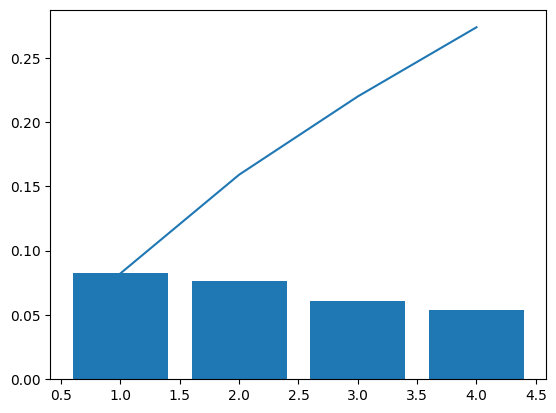

In [42]:
plt.bar(np.arange(1,5),pc.explained_variance_ratio_)
plt.plot(np.arange(1,5),np.cumsum(pc.explained_variance_ratio_))
plt.show()

##MODEL BUILDING

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(transformed_x,y,test_size=0.20,random_state=123)

In [45]:
# Since it is a binary classification problem, we will build models using:
# 1.Logistic Regression
# 2.Decision Tree
# 3.Random Forest
# 4.Bagging Technique
# 5.Adaptive Boosting Technique
# 6.Gradient Boosting Technique
# 7.Extreme Gradient Boosting Technique
# 8.Support Vector Machine

#1)Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
model1=LogisticRegression()

In [48]:
model1.fit(x_train,y_train)

LogisticRegression()

In [49]:
y_train_pred=model1.predict(x_train)
y_test_pred=model1.predict(x_test)

In [50]:
from sklearn.metrics import classification_report,accuracy_score

In [51]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11606
           1       0.00      0.00      0.00       730

    accuracy                           0.94     12336
   macro avg       0.47      0.50      0.48     12336
weighted avg       0.89      0.94      0.91     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2891
           1       0.00      0.00      0.00       193

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



In [52]:
print("Train Data")
logistic_train=round((accuracy_score(y_train,y_train_pred)),2)
logistic_train

Train Data


0.94

In [53]:
print("Test Data")
logistic_test=round((accuracy_score(y_test,y_test_pred)),2)
logistic_test

Test Data


0.94

In [54]:
#We can observe that:
#For Train Data, Accuracy Score= 94%
#For Test Data, Accuracy Score= 94%

#As train data and test data accuracy are equal, we can conclude that there is a prefect bias-variance tradeoff.

#2)Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
model2=DecisionTreeClassifier()

In [57]:
model2.fit(x_train,y_train)

DecisionTreeClassifier()

In [58]:
y_train_pred=model2.predict(x_train)
y_test_pred=model2.predict(x_test)

In [59]:
from sklearn.metrics import classification_report,accuracy_score

In [60]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11606
           1       1.00      1.00      1.00       730

    accuracy                           1.00     12336
   macro avg       1.00      1.00      1.00     12336
weighted avg       1.00      1.00      1.00     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      2891
           1       0.12      0.12      0.12       193

    accuracy                           0.89      3084
   macro avg       0.53      0.53      0.53      3084
weighted avg       0.89      0.89      0.89      3084



In [61]:
print("Train Data")
decision_train=round((accuracy_score(y_train,y_train_pred)),2)
decision_train

Train Data


1.0

In [62]:
print("Test Data")
decision_test=round((accuracy_score(y_test,y_test_pred)),2)
decision_test

Test Data


0.89

In [158]:
#We can observe that:
#For Train Data, Accuracy Score= 100%
#For Test Data, Accuracy Score= 89%

#As train data accuracy is greater than test data accuracy, model is said to be overfitted.

#3)Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier

In [65]:
model3=RandomForestClassifier()

In [66]:
model3.fit(x_train,y_train)

RandomForestClassifier()

In [67]:
y_train_pred=model3.predict(x_train)
y_test_pred=model3.predict(x_test)

In [68]:
from sklearn.metrics import classification_report,accuracy_score

In [69]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11606
           1       1.00      1.00      1.00       730

    accuracy                           1.00     12336
   macro avg       1.00      1.00      1.00     12336
weighted avg       1.00      1.00      1.00     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2891
           1       0.33      0.01      0.02       193

    accuracy                           0.94      3084
   macro avg       0.64      0.50      0.49      3084
weighted avg       0.90      0.94      0.91      3084



In [70]:
print("Train Data")
random_train=round((accuracy_score(y_train,y_train_pred)),2)
random_train

Train Data


1.0

In [71]:
print("Test Data")
random_test=round((accuracy_score(y_test,y_test_pred)),2)
random_test

Test Data


0.94

In [72]:
#We can observe that:
#For Train Data, Accuracy Score= 100%
#For Test Data, Accuracy Score= 94%

#As train data accuracy is greater than test data accuracy and train data accuracy is around 100%, model is said to be overfitted.

#4)Bagging Technique

In [73]:
from sklearn.ensemble import BaggingClassifier

In [74]:
model4=BaggingClassifier()

In [75]:
model4.fit(x_train,y_train)

BaggingClassifier()

In [76]:
y_train_pred=model4.predict(x_train)
y_test_pred=model4.predict(x_test)

In [77]:
from sklearn.metrics import classification_report,accuracy_score

In [78]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     11606
           1       1.00      0.80      0.89       730

    accuracy                           0.99     12336
   macro avg       0.99      0.90      0.94     12336
weighted avg       0.99      0.99      0.99     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2891
           1       0.35      0.03      0.06       193

    accuracy                           0.94      3084
   macro avg       0.65      0.51      0.51      3084
weighted avg       0.90      0.94      0.91      3084



In [79]:
print("Train Data")
bagging_train=round((accuracy_score(y_train,y_train_pred)),2)
bagging_train

Train Data


0.99

In [80]:
print("Test Data")
bagging_test=round((accuracy_score(y_test,y_test_pred)),2)
bagging_test

Test Data


0.94

In [159]:
#We can observe that:
#For Train Data, Accuracy Score= 99%
#For Test Data, Accuracy Score= 94%

#As train data accuracy is greater than test data accuracy and train data accuracy is approaching close to 100%, model is said to be overfitted.

#5)Adaptive Boosting Tchnique

In [82]:
from sklearn.ensemble import AdaBoostClassifier

In [83]:
model5=AdaBoostClassifier()

In [84]:
model5.fit(x_train,y_train)

AdaBoostClassifier()

In [85]:
y_train_pred=model5.predict(x_train)
y_test_pred=model5.predict(x_test)

In [86]:
from sklearn.metrics import classification_report,accuracy_score

In [87]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11606
           1       0.50      0.00      0.01       730

    accuracy                           0.94     12336
   macro avg       0.72      0.50      0.49     12336
weighted avg       0.91      0.94      0.91     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2891
           1       0.00      0.00      0.00       193

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



In [88]:
print("Train Data")
ada_train=round((accuracy_score(y_train,y_train_pred)),2)
ada_train

Train Data


0.94

In [89]:
print("Test Data")
ada_test=round((accuracy_score(y_test,y_test_pred)),2)
ada_test

Test Data


0.94

In [90]:
#We can observe that:
#For Train Data, Accuracy Score= 94%
#For Test Data, Accuracy Score= 94%

#As train data and test data accuracy are equal, we can conclude that there is a prefect bias-variance tradeoff.

#6)Gradient Boosting Technique

In [91]:
from sklearn.ensemble import GradientBoostingClassifier

In [92]:
model6=GradientBoostingClassifier()

In [93]:
model6.fit(x_train,y_train)

GradientBoostingClassifier()

In [94]:
y_train_pred=model6.predict(x_train)
y_test_pred=model6.predict(x_test)

In [95]:
from sklearn.metrics import classification_report,accuracy_score

In [96]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11606
           1       1.00      0.03      0.05       730

    accuracy                           0.94     12336
   macro avg       0.97      0.51      0.51     12336
weighted avg       0.95      0.94      0.92     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2891
           1       0.00      0.00      0.00       193

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



In [97]:
print("Train Data")
gradient_train=round((accuracy_score(y_train,y_train_pred)),2)
gradient_train

Train Data


0.94

In [98]:
print("Test Data")
gradient_test=round((accuracy_score(y_test,y_test_pred)),2)
gradient_test

Test Data


0.94

In [99]:
#We can observe that:
#For Train Data, Accuracy Score= 94%
#For Test Data, Accuracy Score= 94%

#As train data and test data accuracy are equal, we can conclude that there is a prefect bias-variance tradeoff.

#7)Extreme Gradient Boosting Technique

In [100]:
pip install xgboost

In [101]:
from xgboost import XGBClassifier

In [102]:
model7=XGBClassifier()

In [103]:
model7.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [104]:
y_train_pred=model7.predict(x_train)
y_test_pred=model7.predict(x_test)

In [105]:
from sklearn.metrics import classification_report,accuracy_score

In [106]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     11606
           1       0.99      0.37      0.53       730

    accuracy                           0.96     12336
   macro avg       0.98      0.68      0.76     12336
weighted avg       0.96      0.96      0.95     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2891
           1       0.47      0.04      0.08       193

    accuracy                           0.94      3084
   macro avg       0.71      0.52      0.52      3084
weighted avg       0.91      0.94      0.91      3084



In [107]:
print("Train Data")
xgb_train=round((accuracy_score(y_train,y_train_pred)),2)
xgb_train

Train Data


0.96

In [108]:
print("Test Data")
xgb_test=round((accuracy_score(y_test,y_test_pred)),2)
xgb_test

Test Data


0.94

In [160]:
#We can observe that:
#For Train Data, Accuracy Score= 96%
#For Test Data, Accuracy Score= 94%

#We can conclude that there is not a perfect but a good bias-variance trade-off and the model is not much overfitted.

#8)Support Vector Machine

In [110]:
from sklearn.svm import SVC

In [111]:
model8=SVC(kernel='linear')
model8.fit(x_train,y_train)
y_train_pred=model8.predict(x_train)
y_test_pred=model8.predict(x_test)

In [112]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11606
           1       0.00      0.00      0.00       730

    accuracy                           0.94     12336
   macro avg       0.47      0.50      0.48     12336
weighted avg       0.89      0.94      0.91     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2891
           1       0.00      0.00      0.00       193

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



In [113]:
print("Train Data")
svm_train=round((accuracy_score(y_train,y_train_pred)),2)
svm_train

Train Data


0.94

In [114]:
print("Test Data")
svm_test=round((accuracy_score(y_test,y_test_pred)),2)
svm_test

Test Data


0.94

In [115]:
#We can observe that:
#For Train Data, Accuracy Score= 94%
#For Test Data, Accuracy Score= 94%

#As train data and test data accuracy are equal, we can conclude that there is a prefect bias-variance tradeoff.

In [116]:
# From above model building conclusions we can observe that Logistic Regression, Adaptive Boosting Technique,
# Gradient Boosting Technique and Support Vector Machines have the same train data and test data accuracy and
# perfect bias-variance tradeoff.

#We can also observe that Decision Tree, Random Forest and Bagging Technique Turned out to be overfitted models.

#And Extreme Gradient Boosting model has a good bias-variance tradeoff.

In [117]:
# So let's try to apply Grid Search Cross Validation on Decision Tree, Random Forest and Extreme Gradient Boosting Technique
# to see if there are any changes in the accuracies of the model.

##APPLYING GRID SEARCH CROSS VALIDATION

In [118]:
#Applying Grid Search CV on Decision Tree

In [119]:
dt_param={'criterion': ['gini', 'entropy'], 'max_depth': [2,4,6,8,10,12]}

In [120]:
from sklearn.model_selection import GridSearchCV
grid_dt=GridSearchCV(model2,param_grid=dt_param,scoring='f1_macro',cv=5,n_jobs=-1)

In [121]:
grid_dt.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             scoring='f1_macro')

In [122]:
grid_dt.best_estimator_

DecisionTreeClassifier(max_depth=10)

In [123]:
grid_dt.best_score_

0.513996177067067

In [124]:
y_train_pred=grid_dt.predict(x_train)
y_test_pred=grid_dt.predict(x_test)

In [125]:
from sklearn.metrics import classification_report,accuracy_score

In [126]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     11606
           1       0.99      0.17      0.30       730

    accuracy                           0.95     12336
   macro avg       0.97      0.59      0.64     12336
weighted avg       0.95      0.95      0.93     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      0.99      0.96      2891
           1       0.12      0.03      0.04       193

    accuracy                           0.93      3084
   macro avg       0.53      0.51      0.50      3084
weighted avg       0.89      0.93      0.90      3084



In [127]:
print("Train Data")
decision_cv_train=round((accuracy_score(y_train,y_train_pred)),2)
decision_cv_train

Train Data


0.95

In [128]:
print("Test Data")
decision_cv_test=round((accuracy_score(y_test,y_test_pred)),2)
decision_cv_test

Test Data


0.93

In [161]:
# We can observe that for Decision Tree:

# Before Grid Search Cross Validation,
# For Train Data, Accuracy Score= 100%
# For Test Data, Accuracy Score= 89%

# After Grid Search Cross Validation,
# For Train Data, Accuracy Score= 95%
# For Test Data, Accuracy Score= 93%

In [130]:
#Applying Grid Seach CV on Random Forest

In [131]:
random_param={'max_depth':[3,5,7,10],'n_estimators':[50,100,150],'criterion':['gini','entropy']}

In [132]:
from sklearn.model_selection import GridSearchCV
grid_random=GridSearchCV(model3,param_grid=random_param,scoring='f1_macro',cv=5,n_jobs=-1)

In [133]:
grid_random.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 150]},
             scoring='f1_macro')

In [134]:
grid_random.best_estimator_

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=150)

In [135]:
grid_random.best_score_

0.490079428641652

In [136]:
y_train_pred=grid_random.predict(x_train)
y_test_pred=grid_random.predict(x_test)

In [137]:
from sklearn.metrics import classification_report,accuracy_score

In [138]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97     11606
           1       1.00      0.07      0.13       730

    accuracy                           0.95     12336
   macro avg       0.97      0.54      0.55     12336
weighted avg       0.95      0.95      0.92     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      2891
           1       0.00      0.00      0.00       193

    accuracy                           0.94      3084
   macro avg       0.47      0.50      0.48      3084
weighted avg       0.88      0.94      0.91      3084



In [139]:
print("Train Data")
random_cv_train=round((accuracy_score(y_train,y_train_pred)),2)
random_cv_train

Train Data


0.95

In [140]:
print("Test Data")
random_cv_test=round((accuracy_score(y_test,y_test_pred)),2)
random_cv_test

Test Data


0.94

In [162]:
# We can observe that for Random Forest:

# Before Grid Search Cross Validation,
# For Train Data, Accuracy Score= 100%
# For Test Data, Accuracy Score= 94%

# After Grid Search Cross Validation,
# For Train Data, Accuracy Score= 95%
# For Test Data, Accuracy Score= 94%

In [142]:
#Applying Grid Search CV on Extreme Gradient Boosting

In [143]:
xg_param={'n_estimators':[50,100,150,200], 'max_depth':[2,5,7,9]}

In [144]:
from sklearn.model_selection import GridSearchCV
grid_xg=GridSearchCV(model7,param_grid=xg_param,scoring='f1_macro',cv=5,n_jobs=-1)

In [145]:
grid_xg.fit(x_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': [2, 5, 7, 9],
                         'n_estimators': [50, 100, 150, 200]},
             scoring='f1_macro')

In [146]:
grid_xg.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [147]:
grid_xg.best_score_

0.5181565968914444

In [148]:
y_train_pred=grid_xg.predict(x_train)
y_test_pred=grid_xg.predict(x_test)

In [149]:
from sklearn.metrics import classification_report,accuracy_score

In [150]:
print("Train Data")
print(classification_report(y_train,y_train_pred))
print("Test Data")
print(classification_report(y_test,y_test_pred))

Train Data
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     11606
           1       1.00      0.92      0.96       730

    accuracy                           1.00     12336
   macro avg       1.00      0.96      0.98     12336
weighted avg       1.00      1.00      1.00     12336

Test Data
              precision    recall  f1-score   support

           0       0.94      0.99      0.97      2891
           1       0.27      0.04      0.07       193

    accuracy                           0.93      3084
   macro avg       0.60      0.52      0.52      3084
weighted avg       0.90      0.93      0.91      3084



In [151]:
print("Train Data")
xgb_cv_train=round((accuracy_score(y_train,y_train_pred)),2)
xgb_cv_train

Train Data


1.0

In [152]:
print("Test Data")
xgb_cv_test=round((accuracy_score(y_test,y_test_pred)),2)
xgb_cv_test

Test Data


0.93

In [163]:
# We can observe that for Extreme Gradient Boosting Technique:

# Before Grid Search Cross Validation,
# For Train Data, Accuracy Score= 96%
# For Test Data, Accuracy Score= 94%

# After Grid Search Cross Validation,
# For Train Data, Accuracy Score= 100%
# For Test Data, Accuracy Score= 93%

In [154]:
accuracy={'Train Data':[logistic_train,decision_train,random_train,bagging_train,ada_train,gradient_train,
                        xgb_train,svm_train],'Test Data':[logistic_test,decision_test,random_test,bagging_test,ada_test,gradient_test,
                        xgb_test,svm_test]}

In [155]:
print("*****************SUMMARY OF MODEL ACCURACIES*****************")
accuracy_summary=pd.DataFrame(accuracy,index=['Logistic Regression','Decision Tree','Random Forest','Bagging Classifier',
                                              'Adaptive Boosting Technique','Gradient Boosting Technique',
                                              'Extreme Gradient Boosting Technique','Suuport Vector Machine'])
accuracy_summary

*****************SUMMARY OF MODEL ACCURACIES*****************


,Train Data,Test Data
Logistic Regression,0.94,0.94
Decision Tree,1.00,0.89
Random Forest,1.00,0.94
Bagging Classifier,0.99,0.94
Adaptive Boosting Technique,0.94,0.94
Gradient Boosting Technique,0.94,0.94
Extreme Gradient Boosting Technique,0.96,0.94
Suuport Vector Machine,0.94,0.94


In [156]:
accuracy_cv={'Train Data':[decision_train,random_train,xgb_train],'Test Data':[decision_test,random_test,xgb_test],
             'Train Data CV':[decision_cv_train,random_cv_train,xgb_cv_train],'Test Data CV':[decision_cv_test,random_cv_test,xgb_cv_test]}

In [157]:
print("*****************SUMMARY OF MODEL ACCURACIES WITH GRID SEARCH CV APPLIED*****************")
accuracy_cv_summary=pd.DataFrame(accuracy_cv,index=['Decision Tree','Random Forest','Extreme Gradient Boosting Technique'])
accuracy_cv_summary

*****************SUMMARY OF MODEL ACCURACIES WITH GRID SEARCH CV APPLIED*****************


,Train Data,Test Data,Train Data CV,Test Data CV
Decision Tree,1.00,0.89,0.95,0.93
Random Forest,1.00,0.94,0.95,0.94
Extreme Gradient Boosting Technique,0.96,0.94,1.00,0.93
